from https://gist.github.com/genkuroki/53562b1dadc3144e8ed82b7ef8bf7f91

In [12]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [13]:
Nx, Ny = [100, 100]
C0 = torch.rand(Nx, Ny, dtype=torch.double).reshape(1, 1, Nx, Ny)
C = C0
laplacian = torch.tensor([[[[0, 1., 0],
                           [1, -4, 1],
                           [0, 1, 0]]]], dtype=torch.double)
BC = nn.ReplicationPad2d(1)

In [14]:
print(C.shape)
BC(C).shape

torch.Size([1, 1, 100, 100])


torch.Size([1, 1, 102, 102])

In [15]:
%%time
for i in range(10000):
    C = .01 * nn.functional.conv2d(BC(C), laplacian) + C
C

CPU times: user 10.5 s, sys: 7.64 ms, total: 10.5 s
Wall time: 1.75 s


tensor([[[[0.5127, 0.5126, 0.5124,  ..., 0.5182, 0.5182, 0.5182],
          [0.5126, 0.5125, 0.5124,  ..., 0.5182, 0.5182, 0.5182],
          [0.5125, 0.5124, 0.5123,  ..., 0.5181, 0.5181, 0.5181],
          ...,
          [0.4977, 0.4977, 0.4976,  ..., 0.4989, 0.4989, 0.4989],
          [0.4977, 0.4977, 0.4976,  ..., 0.4987, 0.4987, 0.4986],
          [0.4977, 0.4977, 0.4976,  ..., 0.4986, 0.4986, 0.4985]]]],
       dtype=torch.float64)

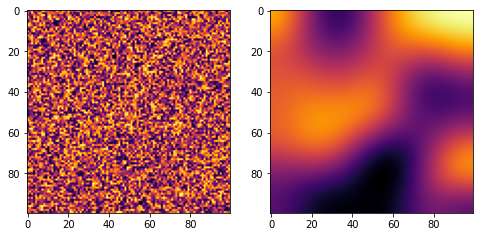

In [16]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(C0.numpy()[0,0,:,:], cmap='inferno')
plt.subplot(122)
plt.imshow(C.numpy()[0,0,:,:], cmap='inferno')